In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1")
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df['casualities']=df['Killed']+df['Wounded']
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [ ]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city               0
latitude        3370
longitude       3371
AttackType         0
Killed          5950
Wounded         7864
Target           429
Summary        61396
Group              0
Target_type        0
Weapon_type        1
Motive         61682
casualities     8095
dtype: int64

In [ ]:
print('Country with Highest Terrorist Attacks: {}'.format(df['Country'].value_counts().index[0]))
print('Regions with Highest Terrorist Attacks: {}'.format(df['Region'].value_counts().index[0]))
print('Maximum people killed in an attack are: {} that happend in {}'.format(df['Killed'].max(), df.loc[df['Killed'].idxmax()].Country))


Country with Highest Terrorist Attacks: Peru
Regions with Highest Terrorist Attacks: South America
Maximum people killed in an attack are: 1180.0 that happend in Rwanda


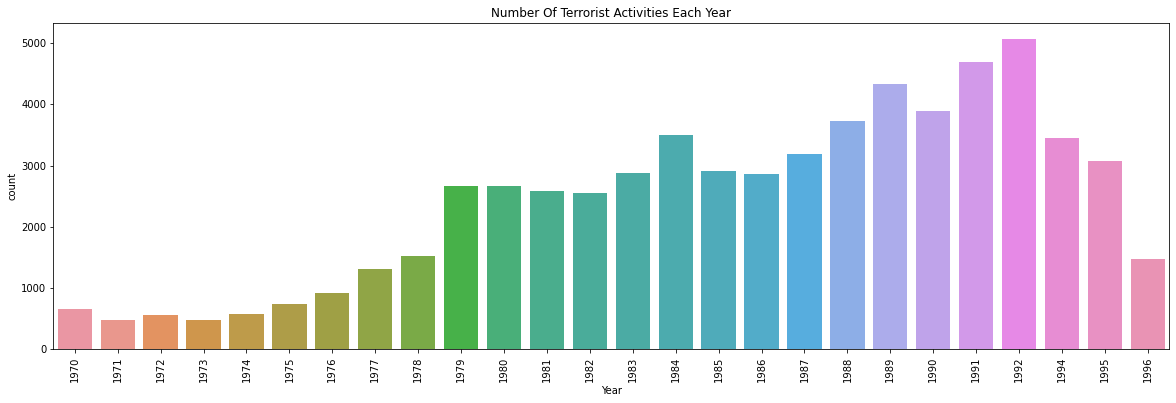

In [ ]:
plt.subplots(figsize=(20,6))
sns.countplot(x=df['Year'])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

The most terrorist activities happend at 1992 then 1991.

In [ ]:
df['Year'].value_counts()

1992    5071
1991    4683
1989    4324
1990    3887
1988    3721
1984    3495
1994    3456
1987    3183
1995    3081
1985    2915
1983    2870
1986    2860
1979    2662
1980    2662
1981    2586
1982    2544
1978    1526
1996    1480
1977    1319
1976     923
1975     740
1970     651
1974     581
1972     568
1973     473
1971     471
Name: Year, dtype: int64

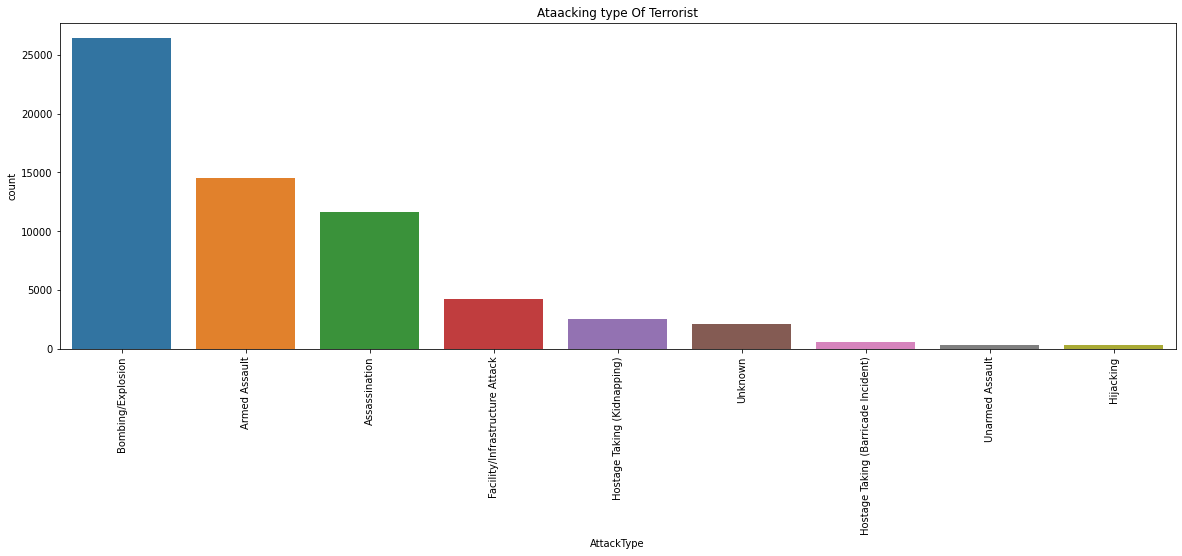

In [ ]:
plt.subplots(figsize=(20,6))
sns.countplot(x=df['AttackType'], order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Ataacking type Of Terrorist')
plt.show()

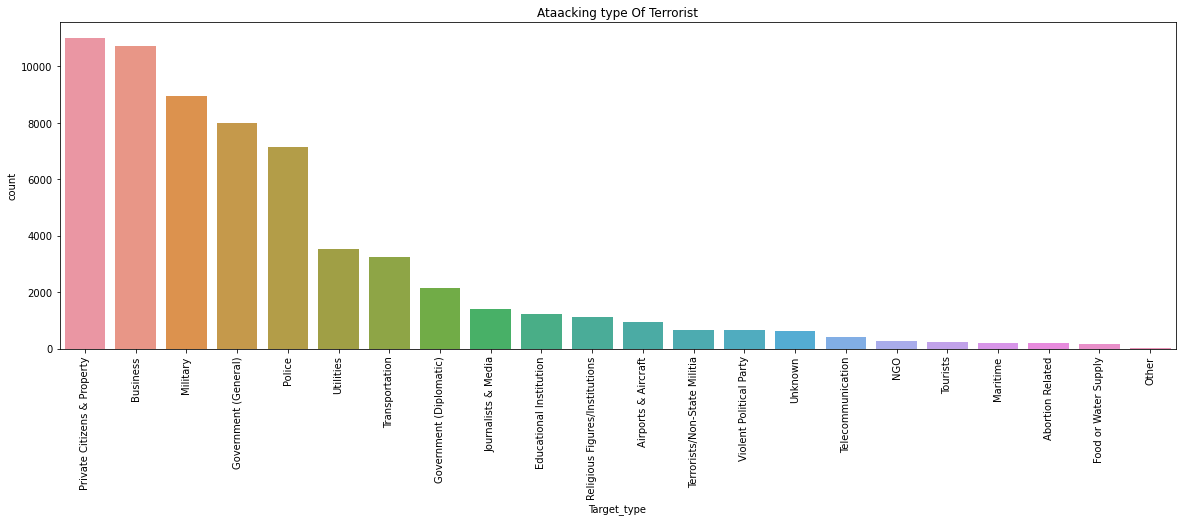

In [ ]:
plt.subplots(figsize=(20,6))
sns.countplot(x=df['Target_type'], order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Ataacking type Of Terrorist')
plt.show()

In [ ]:
df['casualities'].value_counts()

0.0      27103
1.0      10219
2.0       4044
3.0       2507
4.0       1649
         ...  
260.0        1
246.0        1
325.0        1
400.0        1
405.0        1
Name: casualities, Length: 203, dtype: int64

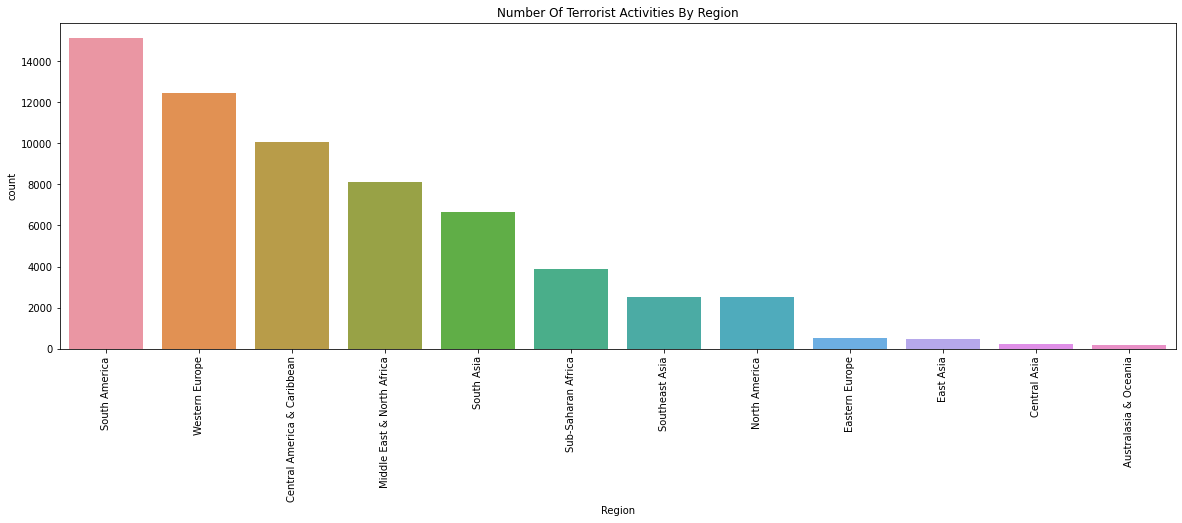

In [ ]:
plt.subplots(figsize=(20,6))
sns.countplot(x=df['Region'], order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

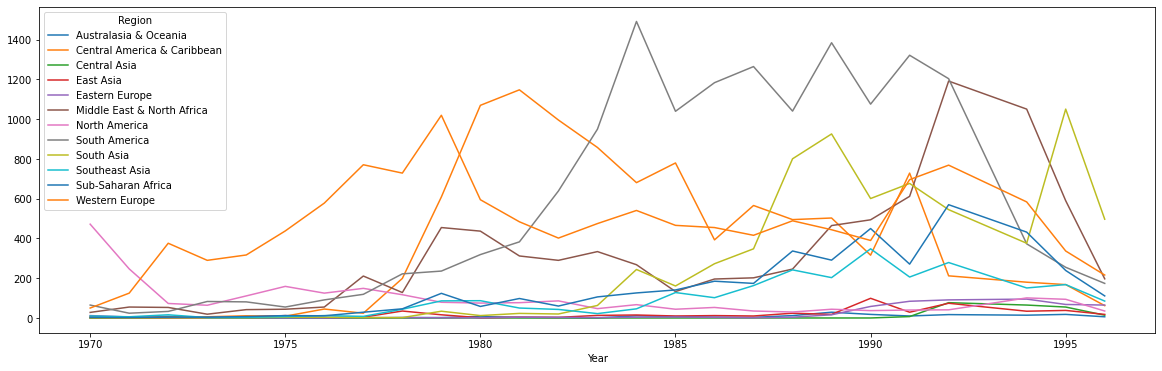

In [ ]:
terror_region=pd.crosstab(df['Year'],df['Region'])
terror_region.plot()
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()

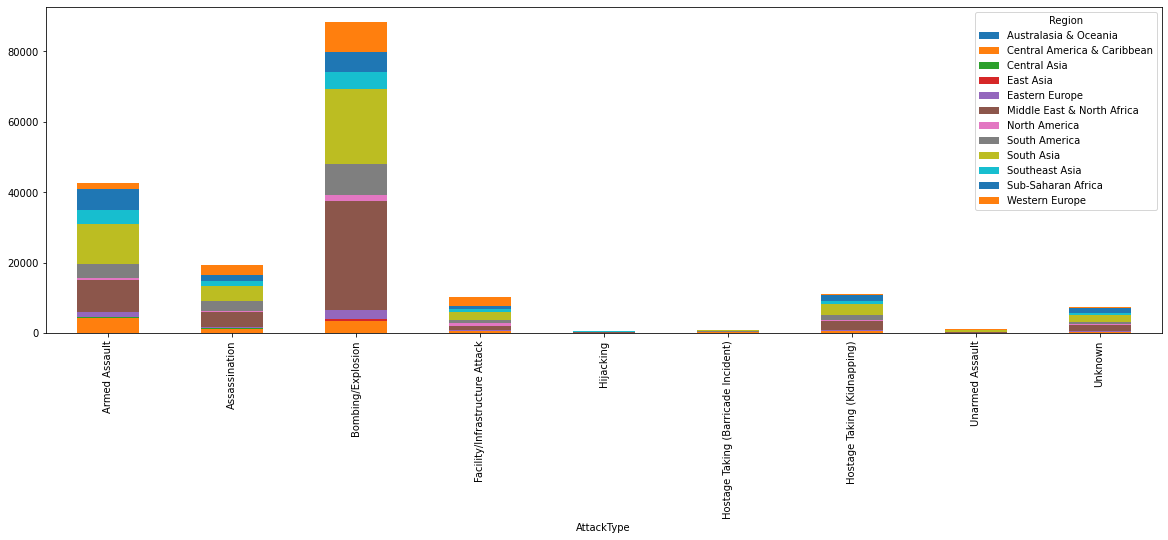

In [ ]:
terror_region=pd.crosstab(df['AttackType'],df['Region'])
terror_region.plot.bar(stacked=True)
fig=plt.gcf()
fig.set_size_inches(20,6)
plt.show()

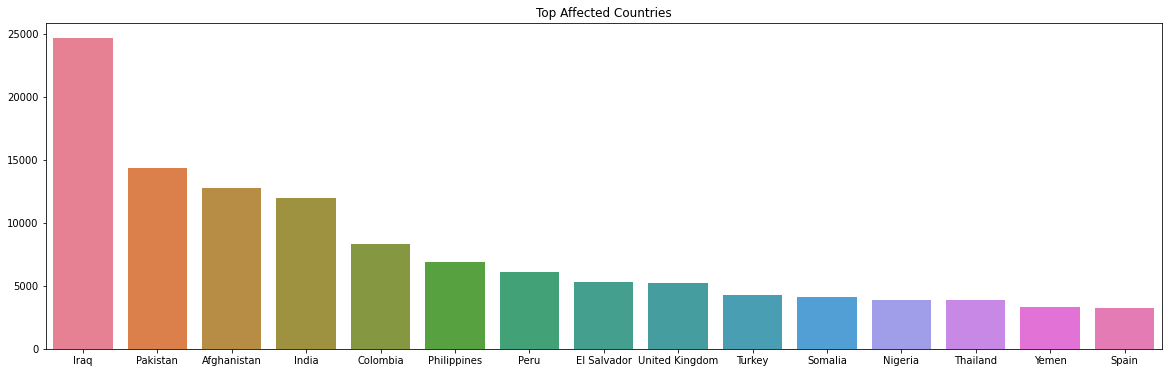

In [ ]:
plt.subplots(figsize=(20,6))
sns.barplot(x=df['Country'].value_counts()[:15].index,y=df['Country'].value_counts()[:15].values, palette='husl')
plt.title('Top Affected Countries')
plt.show()


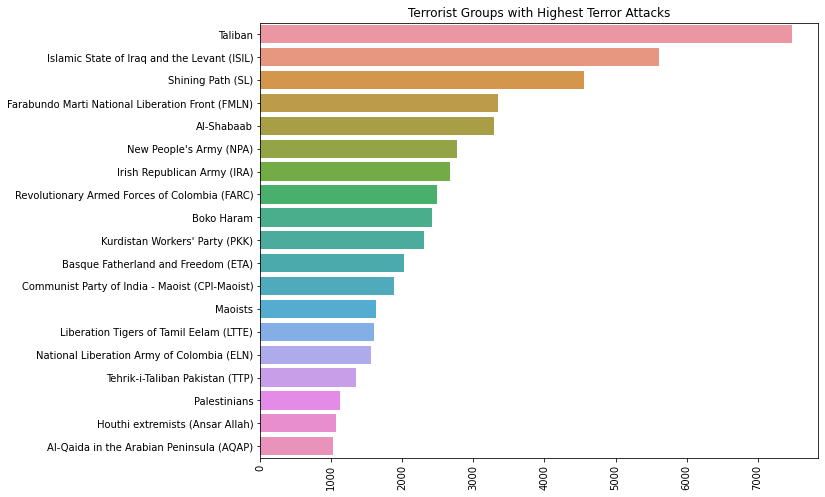

In [ ]:
sns.barplot(x=df['Group'].value_counts()[1:20].values,y=df['Group'].value_counts()[1:20].index)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()